# Support Vector Machine - Soft Margin Classification

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

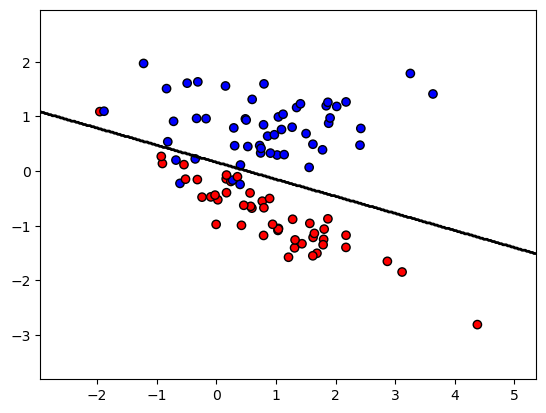

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

np.random.seed(3)
# Step 1: Create a synthetic dataset with some overlap (misclassification), setting in class_sep
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.8)

# Step 2: Train the SVM with a soft margin (using a lower C value to allow misclassification)
# Lower C increases the regularization, allowing more margin violations (misclassification)
model = svm.SVC(kernel='linear', C=0.5)  # C=0.5 allows soft margin

model.fit(X, y)

# Step 3: Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k')

# Create grid to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

# Mark the support vectors
plt.scatter(model.support_[:, 0], model.support_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.title("Soft Margin SVM with Misclassification")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()